## Coverage Pay Data Analysis EDA 

EDA of a dataset from a small charter school network that rolled out coverage pay for the 2023-2024 school year due to staff shortages and to fiscally incentivize staff to cover classes and other duties at their academic campuses in quarter 1 (Q1) which is consists of August, September, and October.

In [1]:
#importing packages
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt

In [2]:
#importing Q1 Coverage Pay dat 
df = pd.read_csv(r"C:\Users\togarro\Downloads\Coverage Tracker (Responses) - SQL Coverage Pay Dataset - Q1.csv", parse_dates = ['Date', 'Date of Coverage'] )

#Dropping columns 
df = df.drop(columns = ['Email Address', 'Supervisor','Coverage Approval','Approved/Unapproved'])

In [3]:
#Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 585 non-null    datetime64[ns]
 1   Name                 585 non-null    object        
 2   Employee No          585 non-null    int64         
 3   Date of Coverage     585 non-null    datetime64[ns]
 4   Type of Coverage     585 non-null    object        
 5   Campus               585 non-null    object        
 6   Number of Coverages  585 non-null    int64         
 7   Total Compensation   585 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 36.7+ KB


In [4]:
#Dataset shape
df.shape

(585, 8)

In [6]:
#Total Q1 Coverage Pay
round(sum(df['Total Compensation']),2)

41699.71

In total, 41,699.71 USD of coverage pay was submitted by staff in Q1.

In [7]:
#Total Number of Coverages
sum(df['Number of Coverages'])

1024

In total, 1,024 coverages were submitted by staff in quarter 1

In [56]:
#Unique number of coverages
df['Campus'].nunique()

3

There are 3 campuses within the small charter school network.

In [59]:
#Number of unique staff
df['Name'].nunique()

72

There were 72 unique staff members that submitted coverage pay.

In [71]:
# Campus Submission
df.groupby('Campus')['Number of Coverages'].sum().sort_values(ascending = False)

Campus
Elementary    562
Collegiate    316
Middle        146
Name: Number of Coverages, dtype: int64

The Elementary Campus submitted the most coverages in Q1, 562, more than 55% higher than the second most coverages submitted, 316.

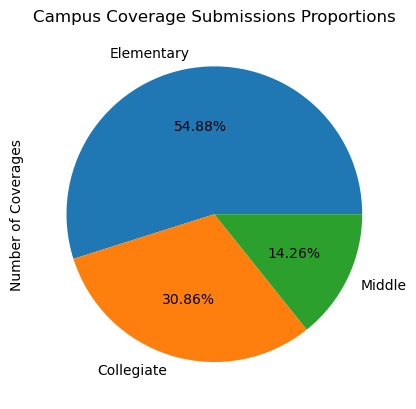

In [74]:
# Campus Submission Proportions
df.groupby('Campus')['Number of Coverages'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct = '%.2f%%', title = 'Campus Coverage Submissions Proportions')
plt.show()

Elementary Campus coverage submission accounted for approximately 55% of all coverages submitted in Q1.

In [8]:
#Creating dataframe to measure Distribution
distribution = df.groupby(['Name','Employee No'])['Total Compensation'].sum().reset_index()
distribution = pd.DataFrame(distribution)
distribution.describe()

#Creating dataframe to merge with distribution dataframe
campus = df[['Employee No','Campus']]

In [9]:
distribution['Total Compensation'].describe()

count      72.000000
mean      579.162639
std       914.789774
min        25.000000
25%        30.000000
50%       150.000000
75%       636.885000
max      4180.000000
Name: Total Compensation, dtype: float64

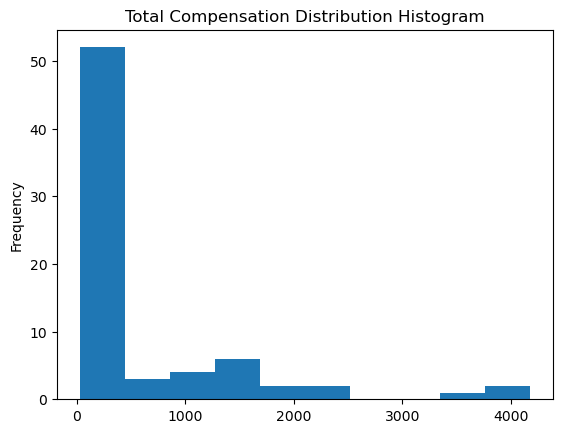

In [50]:
#Total Compensation Distribution
distribution['Total Compensation'].plot(kind = 'hist', title = 'Total Compensation Distribution Histogram')
plt.show()

Majority of the total compensation for staff in Q1 is less than 1,000 USD. However, there is a right skew in the data due to outliers in the dataset inflating the mean of the dataset, indicative of a positive skew.

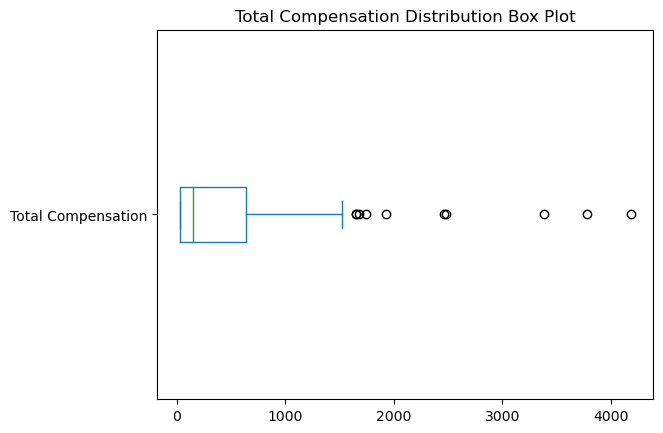

In [51]:
#Total Compensation Distribution
distribution['Total Compensation'].plot(kind = 'box', vert = False, title = 'Total Compensation Distribution Box Plot')
plt.show()

In [55]:
#Finding Outliers within the dataset
Q1 = 30
Q3 = 636.89
IQR = Q3 - Q1
UpperBound = Q3 + (1.5 * IQR)
LowerBound = Q1 - (1.5 * IQR)

UpperBound

1547.225

The boxplot indicates there is a skew identified in the histogram above. Additionally, that there are severl outliers in the dataset, values that are greater than approximately 1,547.23 USD.

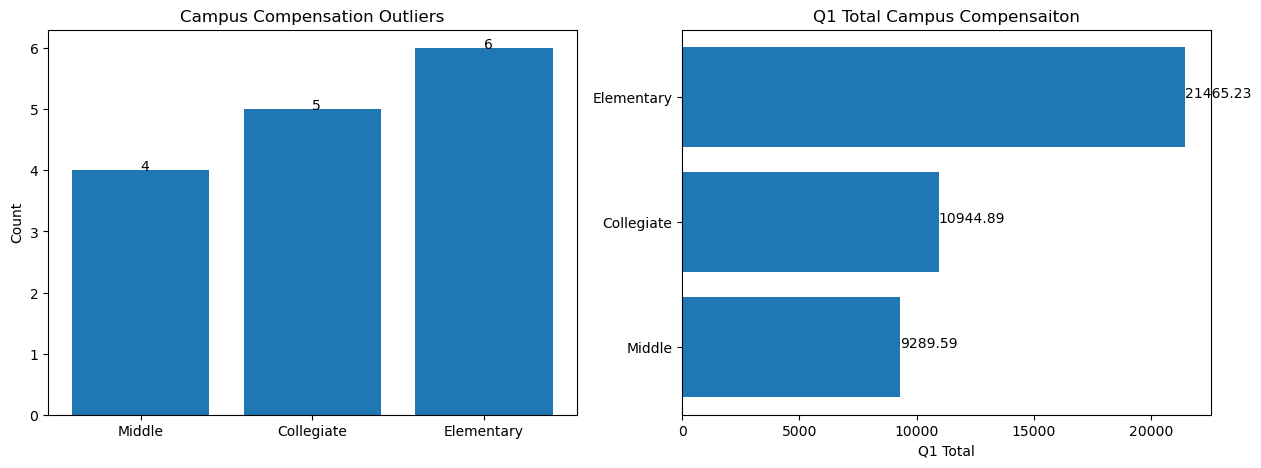

In [112]:
#Finding the campus with the employees that have the most outliers
outliers = distribution[distribution['Total Compensation'] >= UpperBound]

#Merging dataframes
outliers_merge = outliers.merge(campus, how = 'left', on = 'Employee No')

#Outlier Metrics
outliers_campus = outliers_merge.groupby('Campus')['Total Compensation'].nunique().sort_values()
outliers_campus = pd.DataFrame(outliers_campus)

#Total Campus Compensation 
campus_comp_total = round(df.groupby('Campus')['Total Compensation'].sum().sort_values(),2)
campus_comp_total = pd.DataFrame(campus_comp_total)

#Creating subplot figure
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

#Visualizing data
ax[0].bar(outliers_campus.index.values,outliers_campus['Total Compensation'])
ax[1].barh(campus_comp_total.index.values, campus_comp_total['Total Compensation'])

#Labels 
ax[0].set_ylabel('Count')
ax[0].set_title('Campus Compensation Outliers')
ax[1].set_xlabel('Q1 Total')
ax[1].set_title('Q1 Total Campus Compensaiton')

for index, value in enumerate(outliers_campus['Total Compensation']):
    ax[0].text(index, value, str(value))
    
for index, value in enumerate(campus_comp_total['Total Compensation']):
    ax[1].text(value, index, str(value))
    
#Displaying visualization 
plt.show()

The Elementary Campus had the highest count of employees, 6, with compensation greater than 1,547.23 USD.Additionally, the Elementary Campus had a total of 21,465.23 USD worth of coverages submitted. More than double the next closest total of 10,944.89 USD at the Collegiate Campus.